# SYDE 556/750 --- Assignment 2
**Student ID: 20814292**

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Refer to the [PDF](https://github.com/celiasmith/syde556-f22/raw/master/assignments/assignment_02/syde556_assignment_02.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

In [400]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt

# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Generating a random input signal

## 1.1 Band-limited white noise

**a) Time-domain signals.** Plot $x(t)$ for three randomly generated signals with $\texttt{limit}$ at $5$, $10$, and $20\,\mathrm{Hz}$. For each of these, $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$ and $\mathtt{rms}=0.5$.

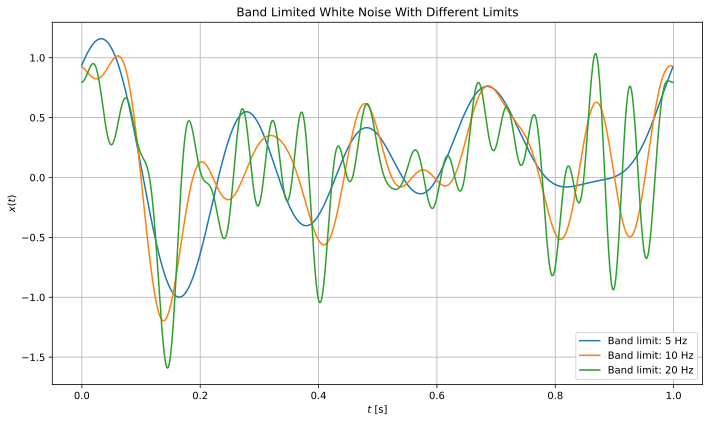

In [401]:
def generate_band_limited_white_noise(T, dt, rms, limit, seed:int = 0):
    np.random.seed(seed)

    N = int(T / dt) # total # of samples
    t = np.arange(0, T, dt)

    w = 2 * np.pi * np.fft.fftfreq(N, d=dt) # units = [rad/s]
    
    # Create random values for the positive frequency components
    X_w_positive = np.random.randn(N//2 + 1) + 1j * np.random.randn(N//2 + 1)
    
    # Mirror values from positive to negative frequencies
    X_w = np.zeros(N, dtype=complex)
    X_w[:N//2 + 1] = X_w_positive
    X_w[N//2 + 1:] = np.conjugate(X_w_positive[1:-1][::-1])

    # Apply frequency limit by setting components above limit to zero
    X_w[np.abs(w) > (2 * np.pi * limit)] = 0
    
    x_t = np.fft.ifft(X_w).real

    # Scale the signal to match the desired RMS
    rms_correction_factor = rms / np.sqrt(np.mean(x_t**2))
    x_t *= rms_correction_factor
    X_w = rms_correction_factor * X_w

    return t, x_t, np.fft.fftshift(w), np.fft.fftshift(X_w)

T = 1.0  # Total time [s]
dt = 0.001  # Time step [s]
limits = [5,10,20]
rms = 0.5

plt.figure(figsize=(10, 6))

for limit in limits:
    t, x_t, _, _ = generate_band_limited_white_noise(T, dt, rms, limit)

    plt.plot(t, x_t, label=f'Band limit: {limit} Hz')
    plt.title('Band Limited White Noise With Different Limits')
    plt.xlabel('$t$ [s]')
    plt.ylabel('$x(t)$')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

**b) Average power spectrum.** Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients, or “power spectrum”) over $100$ signals generated with $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=10\,\mathrm{Hz}$ (of course, each of these 100 signals should have a different `seed`). The plot should have the $x$-axis labeled “$\omega$ in radians” and the average $|X|$ value for that $\omega$ on the $y$-axis.

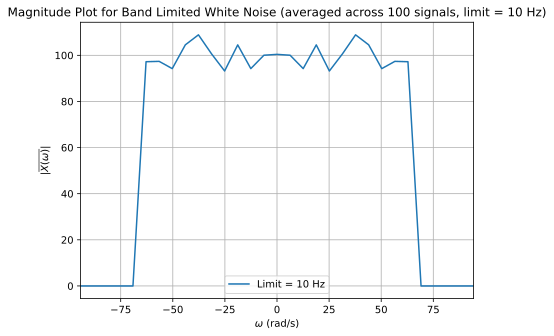

In [402]:
N_signals = 100 # number of signals to average
T = 1.0
dt = 0.001
rms = 0.5
limit = 10

X_w_magnitude_avg = []
for i in range(N_signals):
    _, _, w, X_w = generate_band_limited_white_noise(T, dt, rms, limit, seed=i)
    X_w_magnitude_avg.append(np.abs(X_w))
X_w_magnitude_avg = np.mean(np.array(X_w_magnitude_avg), axis=0)

plt.plot(w, X_w_magnitude_avg, label=f'Limit = {limit} Hz')
plt.xlim(-3 * np.pi * limit, 3 * np.pi * limit) # limit domain for better plotting
plt.title(f'Magnitude Plot for Band Limited White Noise (averaged across 100 signals, limit = {limit} Hz)')
plt.xlabel('$\omega$ (rad/s)')
plt.ylabel(r'$|\overline{X(\omega)}|$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 1.2 Gaussian power spectrum noise

**a) Time-domain signals.** Plot $x(t)$ for three randomly generated signals with `bandwidth` at $5$, $10$, and $20\,\mathrm{Hz}$. For each of these, $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$ and $\mathtt{rms}=0.5$.

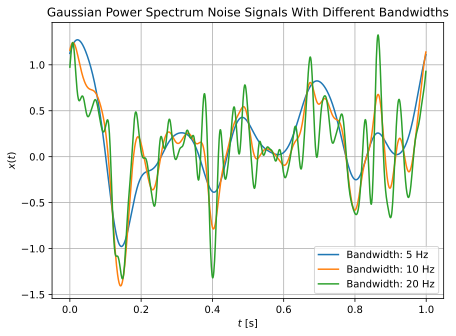

In [403]:
def generate_gaussian_power_spectrum_noise(T, dt, rms, bandwidth, seed=0):
    np.random.seed(seed)

    N = int(T / dt)  # Total number of samples
    t = np.arange(0, T, dt)

    w = 2 * np.pi * np.fft.fftfreq(N, d=dt)

    # Create frequency-dependent standard deviation based on bandwidth
    sigma = np.exp(-w**2 / (2 * (2 * np.pi * bandwidth)**2))

    # Create random values for the positive frequency components
    X_w_positive = np.random.randn(N//2 + 1) + 1j * np.random.randn(N//2 + 1)
    
    # Scale the standard normal distribution by sigma
    X_w_positive *= sigma[:N//2 + 1]

    # Mirror values from positive to negative frequencies
    X_w = np.zeros(N, dtype=complex)
    X_w[:N//2 + 1] = X_w_positive
    X_w[N//2 + 1:] = np.conjugate(X_w_positive[1:-1][::-1])

    # Convert back to time domain using inverse FFT
    x_t = np.fft.ifft(X_w).real

    # Scale the signal to match the desired RMS
    rms_correction_factor = rms / np.sqrt(np.mean(x_t**2))
    x_t *= rms_correction_factor
    X_w = rms_correction_factor * X_w

    return t, x_t, np.fft.fftshift(w), np.fft.fftshift(X_w)

bandwidths = [5, 10, 20]
T = 1.0
dt = 0.001
rms = 0.5

for bandwidth in bandwidths:
    t, x_t, _, _ = generate_gaussian_power_spectrum_noise(T, dt, rms, bandwidth)
    
    plt.plot(t, x_t, label=f'Bandwidth: {bandwidth} Hz')
    plt.title('Gaussian Power Spectrum Noise Signals With Different Bandwidths')
    plt.xlabel('$t$ [s]')
    plt.ylabel('$x(t)$')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

**b) Average power spectrum.** Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients, or “power spectrum”) over $100$ signals generated with $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{bandwidth}=10$ (of course, each of these 100 signals should have a different `seed`). The plot should have the $x$-axis labeled “$\omega$ in radians” and the average $|X|$ value for that $\omega$ on the $y$-axis.

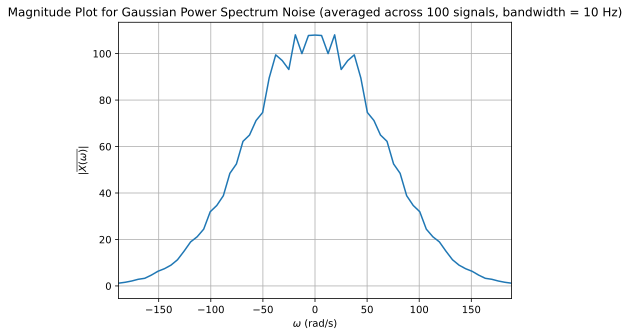

In [404]:
N_signals = 100
T = 1.0 # [s]
dt = 0.001 # [s]
rms = 0.5
bandwidth = 10 # [Hz]

X_w_magnitude_avg = []
for i in range(N_signals):
    _, _, w, X_w = generate_gaussian_power_spectrum_noise(T, dt, rms, bandwidth, seed=i)
    X_w_magnitude_avg.append(np.abs(X_w))
X_w_magnitude_avg = np.mean(np.array(X_w_magnitude_avg), axis=0)

plt.plot(w, X_w_magnitude_avg)
plt.xlim(-6 * np.pi * bandwidth, 6 * np.pi * bandwidth) # limit domain for better plotting
plt.title(f'Magnitude Plot for Gaussian Power Spectrum Noise (averaged across 100 signals, bandwidth = {bandwidth} Hz)')
plt.xlabel('$\omega$ (rad/s)')
plt.ylabel(r'$|\overline{X(\omega)}|$')
plt.grid(True)

plt.tight_layout()
plt.show()

# 2. Simulating a spiking neuron

**a) Spike plots for constant inputs.** Plot the spike output for a constant input of $x=0$ over $1$ second. Report the number of spikes. Do the same thing for $x=1$. Use a time step of $\Delta t = 1\,\mathrm{ms}$ for the simulation.

In [405]:
normalized_spike_voltage = 5.0 # arbitrarily chosen
resting_voltage = 0.0 # [V]
threshold_voltage = 1.0 # [V]
tau_RC = 0.02 # [s]
tau_ref = 0.002 # [s]
j_bias = 1.463350609
alpha = 3.3417905

def J(x, _e):
    return alpha * _e * x + j_bias # x is a scalar

def simulate_LIF_neuron(x_t, dt, _e, initial_state=resting_voltage):
    V_x = []
    refractory_counter = 0
    spike_counter = 0
    for curr_x in x_t:
        if len(V_x) == 0:
            V_x.append(initial_state)
            continue
        elif V_x[-1] < 0:
            V_x.append(0)
            continue
        elif refractory_counter > 0:
            V_x.append(0)
            refractory_counter -= 1
            continue
        elif V_x[-1] < threshold_voltage and V_x[-1] >= 0:
            dv = dt * (1 / tau_RC) * (J(curr_x, _e) - V_x[-1]) 
        elif V_x[-1] >= threshold_voltage and V_x[-1] < normalized_spike_voltage:
            spike_counter += 1
            dv = normalized_spike_voltage - V_x[-1]
        else:
            dv = -normalized_spike_voltage
            refractory_counter = int(tau_ref / dt)
        V_x.append(V_x[-1] + dv)
    print(spike_counter)
    return np.array(V_x)

37
111


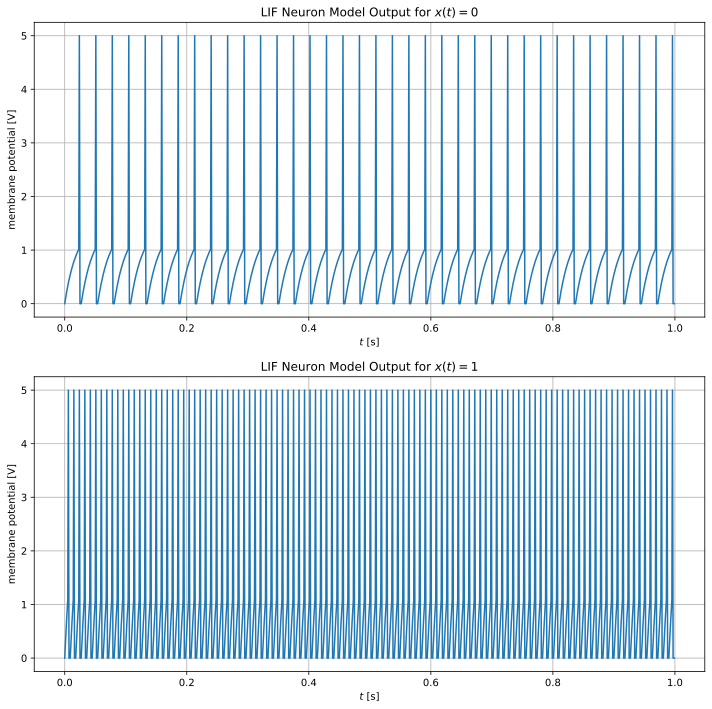

In [406]:
T = 1.0
dt = 0.001
N = int(T / dt)
t = np.arange(0, T, dt)

V_x_0 = simulate_LIF_neuron(np.zeros(N), dt, 1)
V_x_1 = simulate_LIF_neuron(np.ones(N), dt, 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.plot(t, V_x_0)
ax1.set_xlabel('$t$ [s]')
ax1.set_ylabel('membrane potential [V]')
ax1.set_title('LIF Neuron Model Output for $x(t)=0$')
ax1.grid(True)

ax2.plot(t, V_x_1)
ax2.set_xlabel('$t$ [s]')
ax2.set_ylabel('membrane potential [V]')
ax2.set_title('LIF Neuron Model Output for $x(t)=1$')
ax2.grid(True)

plt.tight_layout()
plt.show()

**b) Discussion.** Does the observed number of spikes in the previous part match the expected number of spikes for $x=0$ and $x=1$? Why or why not? What aspects of the simulation would affect this accuracy?

For x = 0, the observed number of spikes (40), matched the expected number of spikes (40). For x = 1, the observed number of spikes (142), did not match the expected number of spikes (150). The discrepancy between the observed and the expected number of spikes can be attributed to multiple factors:
1. Local truncation error (due to linear approximation error from Euler's method). This error is proportional to dt^2
2. Global truncation error (due to accumulation of local truncation error across all time steps). This error is proportional to dt
3. Floating point arithmetic error

**c) Spike plots for white noise inputs.** Plot the spike output for $x(t)$ generated using your function from part 1.1. Use $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=30\,\mathrm{Hz}$. Overlay on this plot $x(t)$.

45


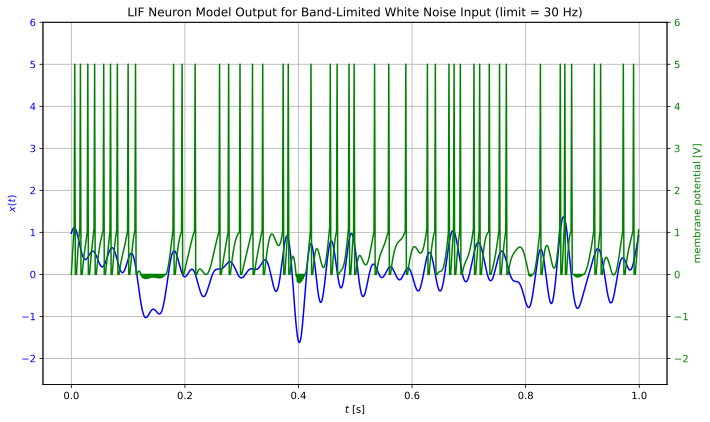

In [407]:
T = 1.0
dt = 0.001
limit = 30
rms = 0.5

t, x_t, _, _ = generate_band_limited_white_noise(T, dt, rms, limit)
V_x_band_limited_white_noise = simulate_LIF_neuron(x_t, dt, 1)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(t, x_t, color='b')
ax1.set_xlabel('$t$ [s]')
ax1.set_ylabel('$x(t)$', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create a secondary axis on the right y-axis for the LIF membrane potential
ax2 = ax1.twinx()
ax2.plot(t, V_x_band_limited_white_noise, color='g')
ax2.set_ylabel('membrane potential [V]', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set the same y-limits for both axes
y_min = min(min(x_t), min(V_x_band_limited_white_noise))
y_max = max(max(x_t), max(V_x_band_limited_white_noise))
ax1.set_ylim([y_min - 1, y_max + 1])
ax2.set_ylim([y_min - 1, y_max + 1])

plt.title(f'LIF Neuron Model Output for Band-Limited White Noise Input (limit = {limit} Hz)')
fig.tight_layout()
plt.show()

**d) Voltage over time.** Using the same $x(t)$ signal as in part *c)*, plot the neuron's voltage over time for the first $0.2$ seconds, along with the spikes over the same time.

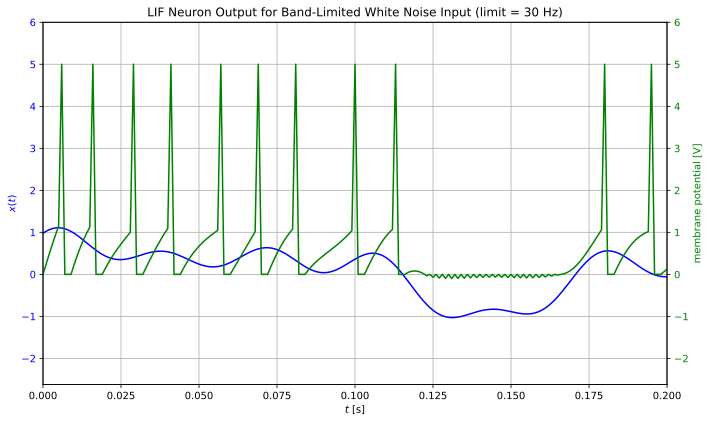

In [408]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(t, x_t, color='b')
ax1.set_xlabel('$t$ [s]')
ax1.set_ylabel('$x(t)$', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xlim([0, 0.2])
ax1.grid(True)

# Create a secondary axis on the right y-axis for the LIF membrane potential
ax2 = ax1.twinx()
ax2.plot(t, V_x_band_limited_white_noise, color='g')
ax2.set_ylabel('membrane potential [V]', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set the same y-limits for both axes
y_min = min(min(x_t), min(V_x_band_limited_white_noise))
y_max = max(max(x_t), max(V_x_band_limited_white_noise))
ax1.set_ylim([y_min - 1, y_max + 1])
ax2.set_ylim([y_min - 1, y_max + 1])

plt.title(f'LIF Neuron Output for Band-Limited White Noise Input (limit = {limit} Hz)')
fig.tight_layout()
plt.show()

**e) 🌟 Bonus question.** How could you improve this simulation (in terms of how closely the model matches actual equation) without significantly increasing the computation time? $0.5$ marks for having a good idea. Up to $1$ mark for actually implementing it and showing that it works.

The simulation can be improved by using a higher-order integration method such as the Runge-Kutta method (RK4), in which the local truncation error is proportional to dt^5, and the global truncation error is proportional to dt^4.

In [409]:
def simulate_LIF_neuron_RK4(x_t, _e, initial_state=resting_voltage):
    V_x = []

    for curr_input in x_t:
        if len(V_x) == 0:
            V_x.append(initial_state)
            continue
        elif V_x[-1] < 0:
            V_x.append(0)
            continue
        elif V_x[-1] < threshold_voltage and V_x[-1] >= 0:
            def dv_dt(v, J):
                return (J - v) / tau_RC
            
            k1 = dv_dt(V_x[-1], J(curr_input, _e))
            k2 = dv_dt(V_x[-1] + 0.5 * dt * k1, J(curr_input, _e))
            k3 = dv_dt(V_x[-1] + 0.5 * dt * k2, J(curr_input, _e))
            k4 = dv_dt(V_x[-1] + dt * k3, J(curr_input, _e))
            dv = (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
        elif V_x[-1] >= threshold_voltage and V_x[-1] < normalized_spike_voltage:
            dv = normalized_spike_voltage - V_x[-1]
        else:
            dv = -normalized_spike_voltage
        V_x.append(V_x[-1] + dv)
    return np.array(V_x)

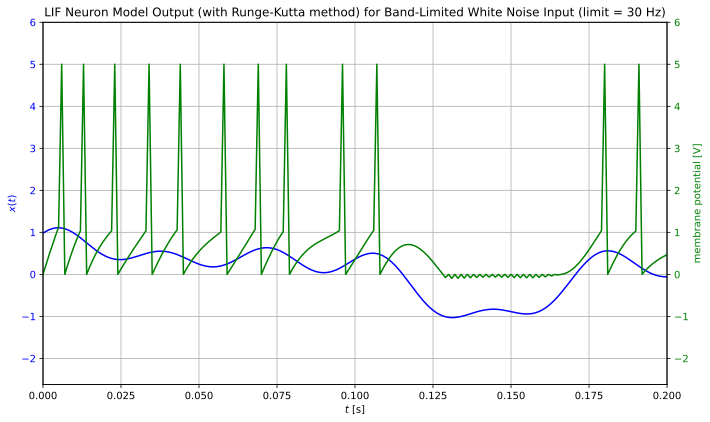

In [410]:
T = 1.0
dt = 0.001
limit = 30
rms = 0.5

t, x_t, _, _ = generate_band_limited_white_noise(T, dt, rms, limit)
V_x_band_limited_white_noise_RK4 = simulate_LIF_neuron_RK4(x_t, 1)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(t, x_t, color='b')
ax1.set_xlabel('$t$ [s]')
ax1.set_ylabel('$x(t)$', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xlim([0, 0.2])
ax1.grid(True)

# Create a secondary axis on the right y-axis for the LIF membrane potential
ax2 = ax1.twinx()
ax2.plot(t, V_x_band_limited_white_noise_RK4, color='g')
ax2.set_ylabel('membrane potential [V]', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set the same y-limits for both axes
y_min = min(min(x_t), min(V_x_band_limited_white_noise_RK4))
y_max = max(max(x_t), max(V_x_band_limited_white_noise_RK4))
ax1.set_ylim([y_min - 1, y_max + 1])
ax2.set_ylim([y_min - 1, y_max + 1])

plt.title(f'LIF Neuron Model Output (with Runge-Kutta method) for Band-Limited White Noise Input (limit = {limit} Hz)')
fig.tight_layout()
plt.show()

# 3. Simulating two spiking neurons

**a) Spike plots for constant inputs.** Plot $x(t)$ and the spiking output for $x(t)=0$ (both neurons should spike at about $40$ spikes per second), as well as (in a separate plot) $x(t)=1$ (one neuron should spike at $\approx 150$ spikes per second, and the other should not spike at all).

37
111
37
0


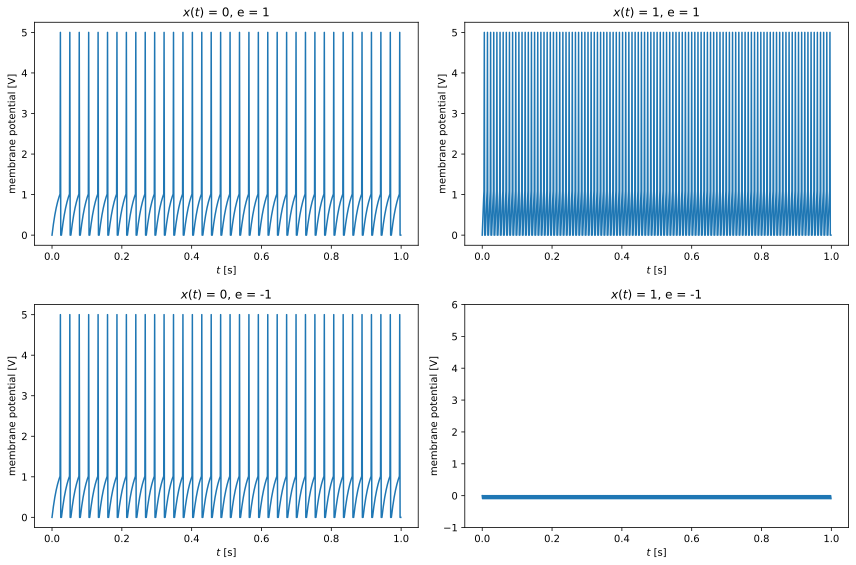

In [411]:
V_x_zero_positive_e = simulate_LIF_neuron(np.zeros(N), dt, 1)
V_x_one_positive_e = simulate_LIF_neuron(np.ones(N), dt, 1)

V_x_zero_negative_e = simulate_LIF_neuron(np.zeros(N), dt, -1)
V_x_one_negative_e = simulate_LIF_neuron(np.ones(N), dt, -1)

t = np.arange(0, T, dt)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].plot(t, V_x_zero_positive_e)
axs[0, 0].set_title('$x(t)$ = 0, e = 1')
axs[0, 0].set_xlabel('$t$ [s]')
axs[0, 0].set_ylabel('membrane potential [V]')

axs[0, 1].plot(t, V_x_one_positive_e)
axs[0, 1].set_title('$x(t)$ = 1, e = 1')
axs[0, 1].set_xlabel('$t$ [s]')
axs[0, 1].set_ylabel('membrane potential [V]')

axs[1, 0].plot(t, V_x_zero_negative_e)
axs[1, 0].set_title('$x(t)$ = 0, e = -1')
axs[1, 0].set_xlabel('$t$ [s]')
axs[1, 0].set_ylabel('membrane potential [V]')

axs[1, 1].plot(t, V_x_one_negative_e)
axs[1, 1].set_title('$x(t)$ = 1, e = -1')
axs[1, 1].set_xlabel('$t$ [s]')
axs[1, 1].set_ylabel('membrane potential [V]')
axs[1, 1].set_ylim([-1, 6])

plt.tight_layout()
plt.show()

**b) Spike plots for a sinusodial input.** Plot $x(t)$ and the spiking output for $x(t)=\frac{1}2 \sin(10 \pi t)$.

35
35


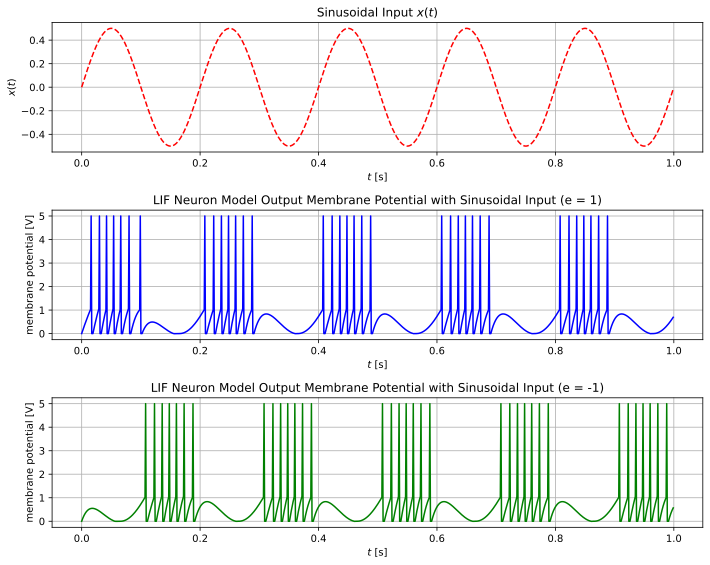

In [412]:
x_t = 0.5 * np.sin(10 * np.pi * t)
V_x_positive_e = simulate_LIF_neuron(x_t, dt, 1)
V_x_negative_e = simulate_LIF_neuron(x_t, dt, -1)

fig, axs = plt.subplots(3, 1, figsize=(10, 8))

axs[0].plot(t, x_t, label=r'$x(t)$ = $\frac{1}{2}\sin(10\pi t)$', linestyle='--', color='r')
axs[0].set_title('Sinusoidal Input $x(t)$')
axs[0].set_xlabel('$t$ [s]')
axs[0].set_ylabel('$x(t)$')
axs[0].grid(True)

axs[1].plot(t, V_x_positive_e, label='Membrane Potential (e = 1)', color='b')
axs[1].set_title('LIF Neuron Model Output Membrane Potential with Sinusoidal Input (e = 1)')
axs[1].set_xlabel('$t$ [s]')
axs[1].set_ylabel('membrane potential [V]')
axs[1].grid(True)

axs[2].plot(t, V_x_negative_e, label='Membrane Potential (e = -1)', color='g')
axs[2].set_title('LIF Neuron Model Output Membrane Potential with Sinusoidal Input (e = -1)')
axs[2].set_xlabel('$t$ [s]')
axs[2].set_ylabel('membrane potential [V]')
axs[2].grid(True)

plt.tight_layout()
plt.show()

**c) Spike plot for a white noise signal.** Plot $x(t)$ and the spiking output for a random signal generated with your function for question 1.1 with $\mathtt{T}=2\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=5\,\mathrm{Hz}$.

102
57


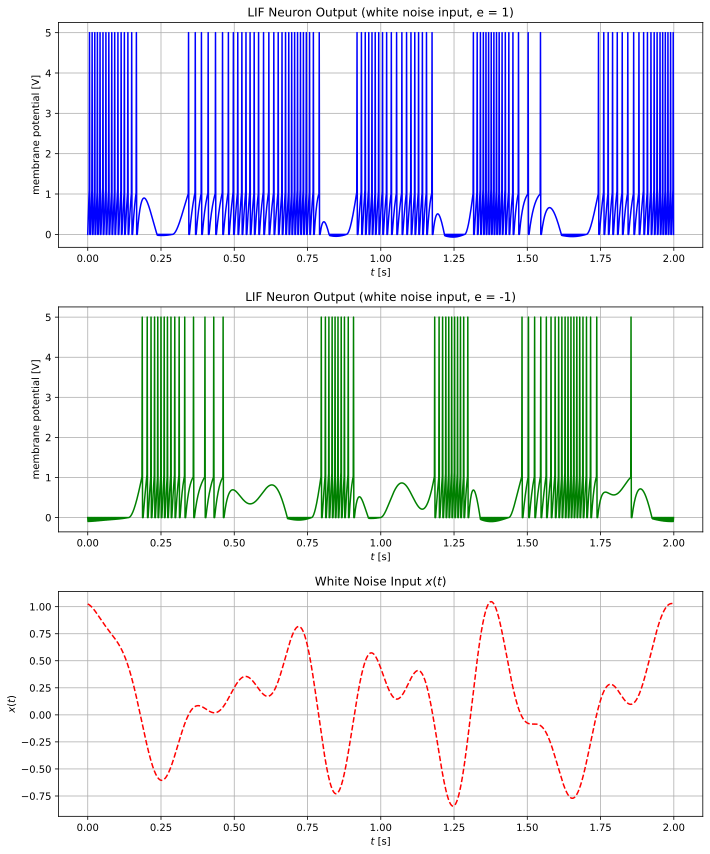

In [413]:
T = 2
dt = 0.001
rms = 0.5
limit = 5

t, x_t, _, X_w = generate_band_limited_white_noise(T, dt, rms, limit)
V_x_band_limited_white_noise_input_positive_e = simulate_LIF_neuron(x_t, dt, 1)
V_x_band_limited_white_noise_input_negative_e = simulate_LIF_neuron(x_t, dt, -1)

fig, axs = plt.subplots(3, 1, figsize=(10, 12))

axs[0].plot(t, V_x_band_limited_white_noise_input_positive_e, color='b')
axs[0].set_title('LIF Neuron Output (white noise input, e = 1)')
axs[0].set_xlabel('$t$ [s]')
axs[0].set_ylabel('membrane potential [V]')
axs[0].grid(True)

axs[1].plot(t, V_x_band_limited_white_noise_input_negative_e, color='g')
axs[1].set_title('LIF Neuron Output (white noise input, e = -1)')
axs[1].set_xlabel('$t$ [s]')
axs[1].set_ylabel('membrane potential [V]')
axs[1].grid(True)

axs[2].plot(t, x_t, linestyle='--', color='r')
axs[2].set_title('White Noise Input $x(t)$')
axs[2].set_xlabel('$t$ [s]')
axs[2].set_ylabel('$x(t)$')
axs[2].grid(True)

plt.tight_layout()
plt.show()

# 4. Computing an optimal filter

**a) Document the code.** Fill in comments where there are `# !`-signs in the Python code. Make sure that your comments (where this makes sense) describe the semantics of the code and do not just repeat what is obvious from the code itself. Run the function with what you wrote for part 3 above, so that it uses the spike signal generated in 3c).

In [414]:
def compute_optimal_filter(
        # Signal generated from your white noise generator
        x,
        # Fourier coefficients from your white noise generator
        X,
        # Spike train from the previous part
        spikes,
        # Time step size
        dt=1e-3
    ):

    # x and X should (effectively) be 1D-arrays
    assert x.ndim == 1 and X.ndim == 1
    assert x.shape[0] == X.shape[0]

    # Nt represents the number of time samples in the input signal, which is the signal generated from the white noise generator
    Nt = x.size

    # Make sure that "spikes" is a 2 x Nt array
    assert spikes.ndim == 2
    assert spikes.shape[0] == 2              
    assert spikes.shape[1] == Nt

    # The total duration of the signal generated from the white noise generator. Units are in seconds
    T = Nt * dt

    # Create an array with each element spaced dt apart. This array represents the time vector. The time vector is then shifted so that the middle element of the vector lines up at t=0
    ts = np.arange(Nt) * dt - T / 2.0

    # Equivalent to np.fft.fftshift(np.fft.fftfreq(Nt, d=dt)). This creates a frequency vector with the middle element of the vector lining up at f=0, with the ends of the frequency vector at/near the Nyquist frequency=(1/dt)/2
    fs = np.arange(Nt) / T - Nt / (2.0 * T)

    # Convert the frequency vector fs, which has units of Hz, to omega, the corresponding angular frequency vector with units of rad/s
    omega = fs * 2.0 * np.pi

    # Difference between the spike trains of the positive encoder LIF Neuron Model and the negative encoder LIF Neuron Model. AKA the spike difference vector.
    r = spikes[0] - spikes[1]

    # Fast fourier transform of the spike train difference vector, shifted in the frequency domain such that the element corresponding to omega = 0 is the middle element of R
    R = np.fft.fftshift(np.fft.fft(r))

    # Standard deviation of the Gaussian low pass filter
    sigma_t = 25e-3

    # Gaussian low pass filter 
    W2 = np.exp(-omega**2*sigma_t**2)

    # Normalizing the gaussian low pass filter such that its overall integral is 1 to preserve the energy of a DC input signal
    W2 = W2 / sum(W2)

    # Product of the fourier transform of the input signal, X, with the complex conjugate of R (fourier transform of spike train difference)
    CP = X*R.conjugate()

    # Smoothing CP by convolving with the gaussian low pass filter. Numerator of equation 3 for the Optimal Windowed Filter
    WCP = np.convolve(CP, W2, 'same')

    # Magnitude of R (real valued, any imaginary values should be zero, and if present, is due to floating point error)
    RP = R*R.conjugate()

    # Smoothing RP by convolving with the gaussian low pass filter. Denominator of equation 3 for the Optimal Windowed Filter
    WRP = np.convolve(RP, W2, 'same')

    # Magnitude of X (real valued, any imaginary values should be zero, and if present, is due to floating point error)
    XP = X*X.conjugate()

    # Smoothing input X by convoling with the gaussian low pass filter.
    WXP = np.convolve(XP, W2, 'same')

    # Calculating the optimal filter
    H = WCP / WRP

    # Transforming optimal filter from frequency domain to time domain. Shifting H to prepare of inverse FFT, performing the inverse FFT, shifting the output in the time domain to ensure signal is aligned with ts, and extracting the real component
    h = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(H))).real

    # Multiplication in the frequency domain, equivalent to convolving in time domain, of the optimal filter and the spike train difference to smooth out the spike train difference
    XHAT = H*R

    # Transforming smoothed spike trains from frequency domain to time domain. Shifting XHAT to prepare the inverse FFT, performing the inverse FFT, and extracting the real part, discarding the imaginary part
    xhat = np.fft.ifft(np.fft.ifftshift(XHAT)).real

    return ts, fs, R, H, h, XHAT, xhat, XP, WXP

spikes = np.stack((V_x_band_limited_white_noise_input_positive_e, V_x_band_limited_white_noise_input_negative_e), axis=0)
ts, fs, R, H, h, XHAT, xhat, XP, WXP = compute_optimal_filter(x_t, X_w, spikes)

**b) Optimal filter.** Plot the time and frequency plots of the optimal filter for the signal you generated in question 3c). Make sure to use appropriate limits for the $x$-axis.

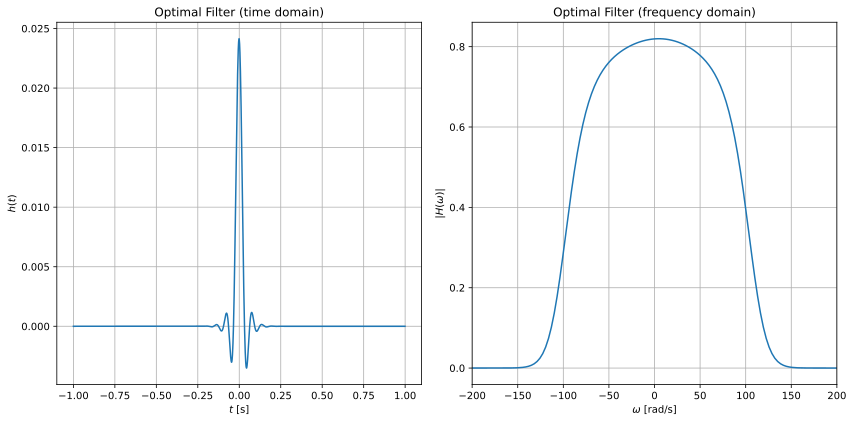

In [415]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(ts, h)
plt.title('Optimal Filter (time domain)')
plt.xlabel('$t$ [s]')
plt.ylabel('$h(t)$')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(2*np.pi*fs, np.abs(H))
plt.title('Optimal Filter (frequency domain)')
plt.xlabel('$\omega$ [rad/s]')
plt.ylabel('$|H(\omega)|$')
plt.grid(True)
plt.xlim([-200, 200]) # limit domain for better plotting

plt.tight_layout()
plt.show()

**c) Decoded signal.** Plot the $x(t)$ signal, the spikes, and the decoded $\hat x(t)$ value for the signal from 3c).

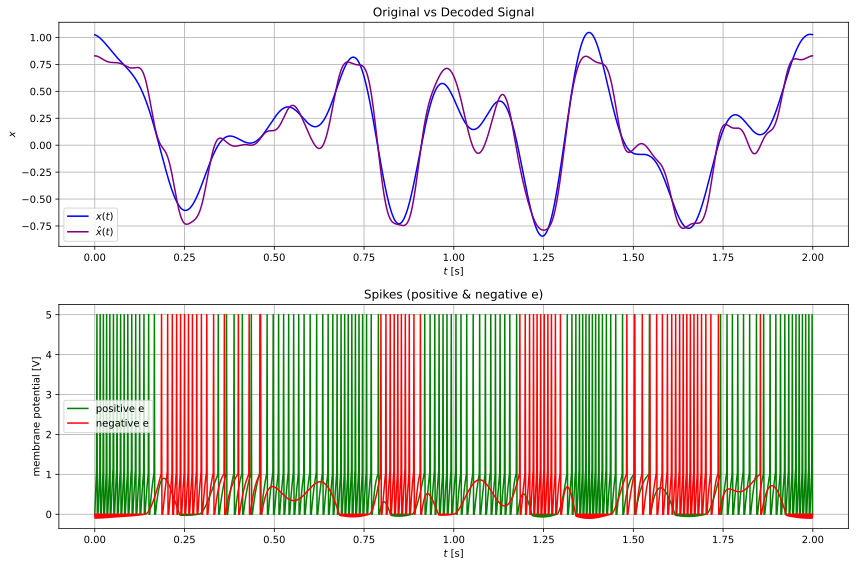

In [416]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t, x_t, label='$x(t)$', color='blue')
plt.plot(t, xhat, label='$\hat{x}(t)$', color='purple')
plt.title('Original vs Decoded Signal')
plt.xlabel('$t$ [s]')
plt.ylabel('$x$')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, spikes[0], label='positive e', color='green')
plt.plot(t, spikes[1], label='negative e', color='red')
plt.title('Spikes (positive & negative e)')
plt.xlabel('$t$ [s]')
plt.ylabel('membrane potential [V]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**d) Power spectra.** Plot the signal $|X(\omega)|$, spike response $|R(\omega)|$, and filtered signal $|\hat X(\omega)|$ power spectra for the signal from 3c).

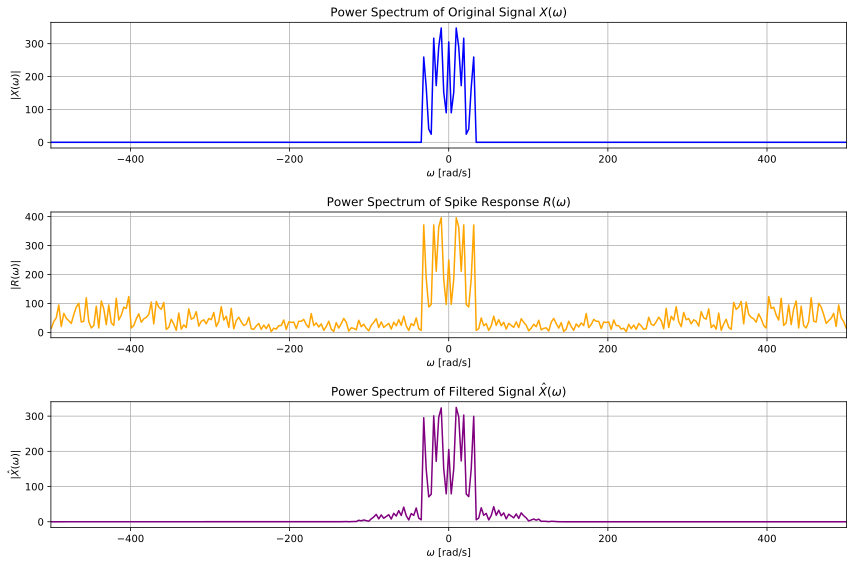

In [417]:
magnitude_X = np.abs(X_w)
magnitude_R = np.abs(R)
magnitude_XHAT = np.abs(XHAT)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(2*np.pi*fs, magnitude_X, color='blue')
plt.title('Power Spectrum of Original Signal $X(\omega)$')
plt.xlabel('$\omega$ [rad/s]')
plt.ylabel('$|X(\omega)|$')
plt.xlim([-500, 500]) # limit domain for better plotting
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(2*np.pi*fs, magnitude_R, color='orange')
plt.title('Power Spectrum of Spike Response $R(\omega)$')
plt.xlabel('$\omega$ [rad/s]')
plt.ylabel('$|R(\omega)|$')
plt.xlim([-500, 500]) # limit domain for better plotting
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(2*np.pi*fs, magnitude_XHAT, color='purple')
plt.title('Power Spectrum of Filtered Signal $\hat{X}(\omega)$')
plt.xlabel('$\omega$ [rad/s]')
plt.ylabel('$|\hat{X}(\omega)|$')
plt.xlim([-500, 500]) # limit domain for better plotting
plt.grid(True)

plt.tight_layout()
plt.show()

**e) Discussion.** How do these spectra relate to the optimal filter?

Looking at the spectra of the original signal and the corresponding spike response, 
it is evident that the quality of the original signal can be preserved by attenuating the high frequencies
and passing the low frequencies, which was performed by multiplication of the optimal filter. By doing so,
we can obtain a somewhat accurate estimation of the input, of which its spectrum can be seen as the bottom most plot, 
the power spectrum of the filtered signal

**f) Filter for different signal bandwidths.** Plot the optmial filter $h(t)$ in the time domain when filtering spike trains for white noise signals with different `limit` values of $2\,\mathrm{Hz}$, $10\,\mathrm{Hz}$, and $30\,\mathrm{Hz}$.

106
49
93
63
86
64


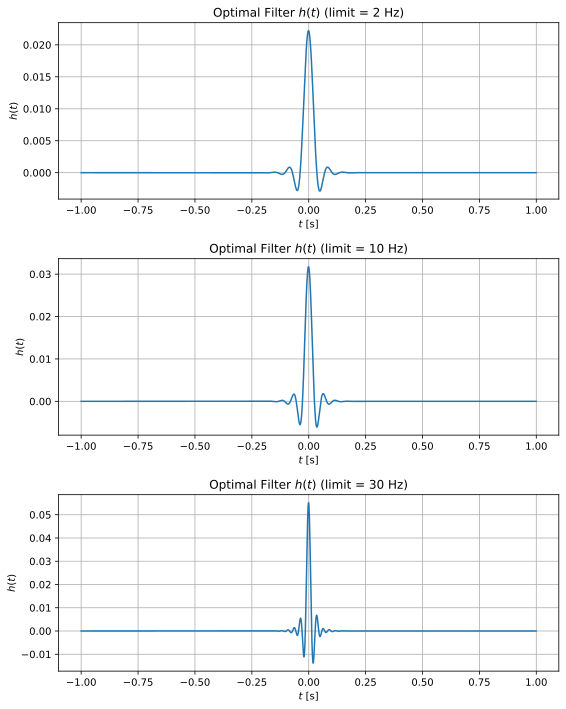

In [418]:
T = 2
dt = 0.001
rms = 0.5
limits = [2,10,30]

fig, axes = plt.subplots(len(limits), 1, figsize=(8, 10))

for i , limit in enumerate(limits):
    _, x_t_i, _, X_w_i = generate_band_limited_white_noise(T, dt, rms, limit)
    V_x_positive_e_i = simulate_LIF_neuron(x_t_i, dt, 1)
    V_x_negative_e_i = simulate_LIF_neuron(x_t_i, dt, -1)

    ts, _, _, _, h, _, _, _, _ = compute_optimal_filter(x_t_i, X_w_i, np.stack((V_x_positive_e_i, V_x_negative_e_i), axis=0))

    axes[i].plot(ts, h)
    axes[i].set_title(f'Optimal Filter $h(t)$ (limit = {limit} Hz)')
    axes[i].set_xlabel('$t$ [s]')
    axes[i].set_ylabel('$h(t)$')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

**g) Discussion.** Describe the effects on the time plot of the optimal filter as `limit` increases. Why does this happen?

As limit increases, the time plot of the optimal filter appears to contain more and more high frequency content.
This happens because as the limit variable increases, there is going to be more higher frequency content in the
input signal. Therefore, to accurately estimate the input signal, the cutoff frequency of the optimal filter must also expand, 
which results in the larger amount of high frequency content in the above plots as limit increases.

# Using post-synaptic currents as a filter


**a) Plotting the filter for different $n$.** Plot the normalized $h(t)$ for $n=0$, $1$, and $2$, with $\tau=7\,\mathrm{ms}$.

c can be expressed in terms of the Gamma function by using substitution to rewrite the integral:
$$
c = \int_0^\infty t^n e^{-\frac{t}{\tau}} ,\mathrm{d}t = \tau^{n+1} \Gamma(n+1)
$$
$$
c(n=0) = \tau^{1} \Gamma(1) = \tau^{1} \cdot 1 = \tau
$$
$$
c(n=1) = \tau^{2} \Gamma(2) = \tau^{2} \cdot 1 = \tau^2
$$
$$
c(n=2) = \tau^{3} \Gamma(3) = \tau^{3} \cdot 2 = 2\tau^3
$$

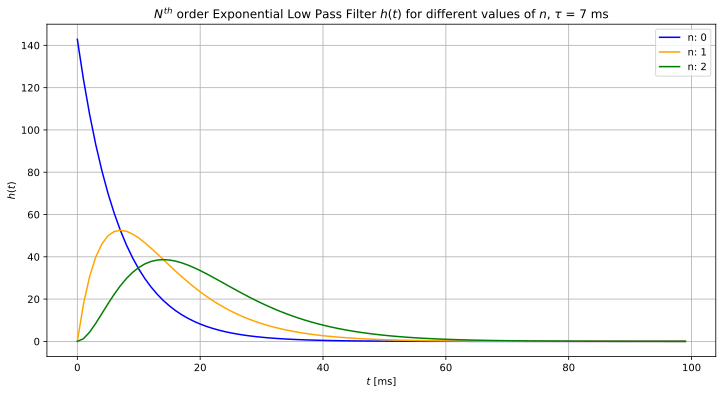

In [419]:
tau = 7e-3  # [s]
T = 0.1  # max time 0.1 seconds, appropriate amount of time for filter window, as h(t) ~= 0 beyond 0.1 seconds
dt = 1e-3 # [s]
filter_t = np.arange(0, T, dt)

def h_n0(_time_vector, tau):
    return np.where(_time_vector >= 0, np.exp(-_time_vector / tau) / tau, 0)
def h_n1(_time_vector, tau):
    return np.where(_time_vector >= 0, (_time_vector * np.exp(-_time_vector / tau)) / (tau**2), 0)
def h_n2(_time_vector, tau):
    return np.where(_time_vector >= 0, (_time_vector**2 * np.exp(-_time_vector / tau)) / (2 * tau**3), 0)

h0 = h_n0(filter_t, tau)
h1 = h_n1(filter_t, tau)
h2 = h_n2(filter_t, tau)

plt.figure(figsize=(12, 6))
plt.plot(filter_t * 1000, h0, label='n: 0', color='blue')
plt.plot(filter_t * 1000, h1, label='n: 1', color='orange')
plt.plot(filter_t * 1000, h2, label='n: 2', color='green')
plt.title(r'$N^{th}$ order Exponential Low Pass Filter $h(t)$ for different values of $n$, $\tau$ = ' + f'{tau * 1000:.0f} ms')
plt.xlabel('$t$ [ms]')
plt.ylabel('$h(t)$')
plt.legend()
plt.grid()
plt.show()

**b) Discussion.** What two things do you expect increasing $n$ will do to $\hat{x}(t)$?

As n increases, there will be less high frequency content present in x_hat. Additionally, as n increases, x_hat's time delay will also increase, since the peak magnitude of each spike is occurring later instead of earlier/instantaneously.

**c) Plotting the filter for different $\tau$.** Plot the normalized $h(t)$ for $\tau=2\,\mathrm{ms}$, $\tau=5\,\mathrm{ms}$, $\tau=10\,\mathrm{ms}$, $\tau=20\,\mathrm{ms}$ with $n = 0$.

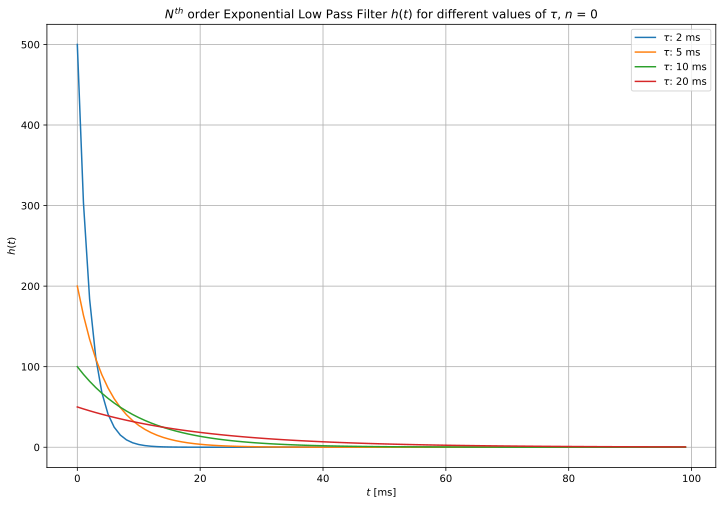

In [420]:
taus = [2e-3, 5e-3, 10e-3, 20e-3]

plt.figure(figsize=(12, 8))

for tau in taus:
    h_n0_t = h_n0(filter_t, tau) # h(t) for n = 0
    plt.plot(filter_t * 1000, h_n0_t, label=f'$\\tau$: {tau * 1000:.0f} ms') # Convert time to ms for plotting

plt.title(r'$N^{th}$ order Exponential Low Pass Filter $h(t)$ for different values of $\tau$, $n$ = 0')
plt.xlabel('$t$ [ms]')
plt.ylabel('$h(t)$')
plt.legend()
plt.grid()
plt.show()

**d) Discussion.** What two things do you expect increasing $\tau$ will do to $\hat{x}(t)$?

As $\tau$ increases, there will be less high frequency content present in x_hat. Additionally, I would expect the rise time and settling time of x_hat to increase, as the energy of the signal is spread out over a longer period of time.

**e) Decoding a spike-train using the post-synaptic current filter.** Decode $\hat{x}(t)$ from the spikes generated in question 3c) using an $h(t)$ with $n=0$ and $\tau=7\,\mathrm{ms}$. Do this by generating the spikes, filtering them with $h(t)$, and using that as your activity matrix $A$ to compute your decoders. Plot the time and frequency plots for this $h(t)$. Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.

In [421]:
tau = 7e-3  # [s]

h_n0_t = h_n0(filter_t, tau)
H_n0_w = np.fft.fft(h_n0_t)
w = 2 * np.pi * np.fft.fftfreq(len(filter_t), d=dt)

def filter_signal(signal):
    filtered_signal = np.zeros(len(signal))
    
    # Loop through the signal and apply the filter h(t) at each spike location
    for i, curr_signal in enumerate(signal):
        if curr_signal == normalized_spike_voltage:
            if i + len(h_n0_t) <= len(signal):
                filtered_signal[i:i+len(h_n0_t)] += h_n0_t
            else: # Handle case when spike occurs near the end, trim h_n0_t accordingly
                filtered_signal[i:] += h_n0_t[:len(signal) - i]
    
    return filtered_signal

filtered_spikes = np.array([filter_signal(spikes[0]), filter_signal(spikes[1])])
# print(filter_signal(spikes[0] - spikes[1]))
D = np.array(np.linalg.lstsq(filtered_spikes.T, x_t, rcond=None)[0])
x_hat_t = filtered_spikes.T @ D
print(D)

[ 0.00459474 -0.00430735]


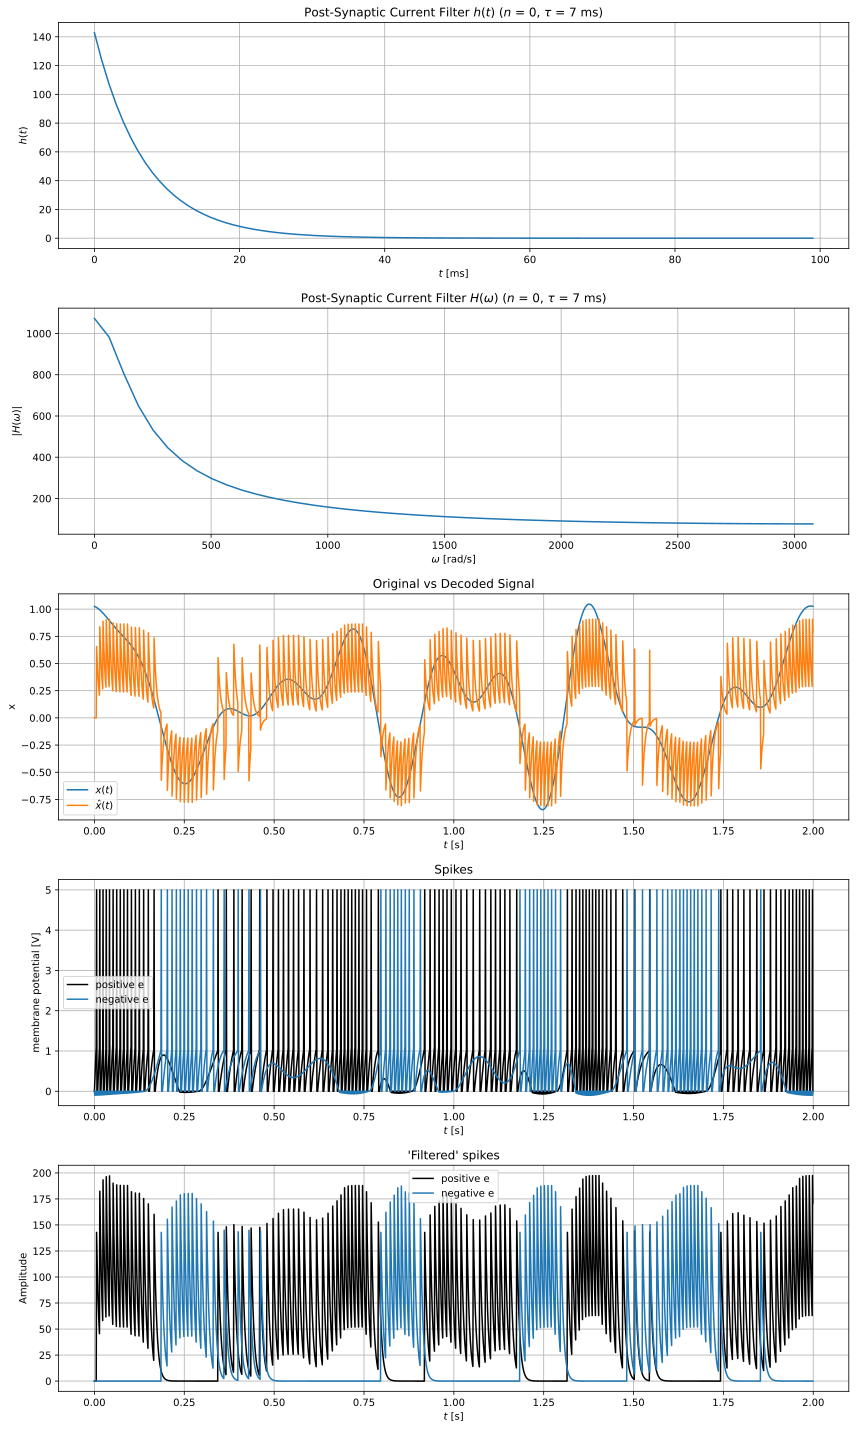

In [422]:
plt.figure(figsize=(12, 20))
plt.subplot(5, 1, 1)
plt.plot(filter_t * 1000, h_n0_t)
plt.title('Post-Synaptic Current Filter $h(t)$ ($n$ = 0, $\\tau$ = 7 ms)')
plt.xlabel('$t$ [ms]')
plt.ylabel('$h(t)$')
plt.grid(True)

plt.subplot(5, 1, 2)
plt.plot(w[:len(w)//2], np.abs(H_n0_w[:len(H_n0_w)//2]))
plt.title('Post-Synaptic Current Filter $H(\omega)$ ($n$ = 0, $\\tau$ = 7 ms)')
plt.xlabel('$\omega$ [rad/s]')
plt.ylabel('$|H(\omega)|$')
plt.grid(True)

plt.subplot(5, 1, 3)
plt.plot(t, x_t, label='$x(t)$')
plt.plot(t, x_hat_t, label='$\hat{x}(t)$')
plt.title('Original vs Decoded Signal')
plt.xlabel('$t$ [s]')
plt.ylabel('x')
plt.grid(True)
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(t, spikes[0], label='positive e', color='k')
plt.plot(t, spikes[1], label='negative e')
plt.title('Spikes')
plt.xlabel('$t$ [s]')
plt.ylabel('membrane potential [V]')
plt.grid(True)
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(t, filtered_spikes[0], label='positive e', color='k')
plt.plot(t, filtered_spikes[1], label='negative e')
plt.title("'Filtered' spikes")
plt.xlabel("$t$ [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

**f) Deocding a spike-train representing a low-frequency signal.** Use the same decoder and $h(t)$ as in part e), but generate a new $x(t)$ with $\mathtt{limit}=2\,\mathrm{Hz}$. Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.

In [423]:
T = 2
dt = 0.001
rms = 0.5
limit = 2

t, x_t, _, X_w = generate_band_limited_white_noise(T, dt, rms, limit)
V_x_band_limited_white_noise_input_positive_e = simulate_LIF_neuron(x_t, dt, 1)
V_x_band_limited_white_noise_input_negative_e = simulate_LIF_neuron(x_t, dt, -1)

filtered_spikes = np.array([filter_signal(V_x_band_limited_white_noise_input_positive_e), filter_signal(V_x_band_limited_white_noise_input_negative_e)])
x_hat_t = filtered_spikes.T @ D

106
49


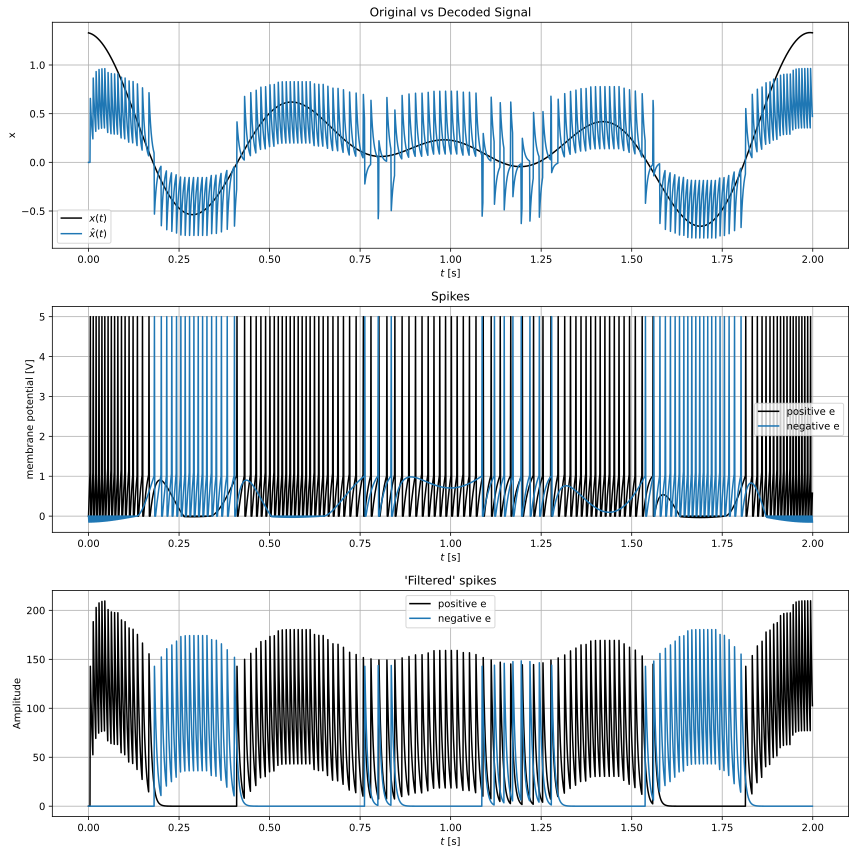

In [424]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
plt.plot(t, x_t, label='$x(t)$', color='k')
plt.plot(t, x_hat_t, label='$\hat{x}(t)$')
plt.title('Original vs Decoded Signal')
plt.xlabel('$t$ [s]')
plt.ylabel('x')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, V_x_band_limited_white_noise_input_positive_e, label='positive e', color='k')
plt.plot(t, V_x_band_limited_white_noise_input_negative_e, label='negative e')
plt.title('Spikes')
plt.xlabel('$t$ [s]')
plt.ylabel('membrane potential [V]')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, filtered_spikes[0], label='positive e', color='k')
plt.plot(t, filtered_spikes[1], label='negative e')
plt.title("'Filtered' spikes")
plt.xlabel("$t$ [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

**g) Discussion.** How do the decodings from e) and f) compare? Explain.

Comparing the decodings from e and f, both decodings appear to estimate the original signal to the same degree of accuracy. As the band limit for computing the decoder was wider than the limit of the signal in f, the decoder should contain 'information' to make that estimate accurately, potentially to the same degree as the signal in e